## ***Twitter Data Analysis on US Airlines - FEB 2015***


importing data


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving Airlines_Data_tweets.xlsx to Airlines_Data_tweets.xlsx


In [ ]:
import io
#data = io.BytesIO(uploaded.get('Airlines_Data_tweets.xlsx'))
#df=pd.read_excel(data)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1=pd.read_excel('/content/drive/MyDrive/gartnerasses/Airlines_Data_TW.xlsx')

In [ ]:
df1.head()

,tweet_id,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,568581908075932992,abyrley,1,@SouthwestAir please do something about the sp...,NaN,2015-02-19 17:24:25,"Raleigh, NC",NaN
1,567778009013177984,realmikesmith,0,@united So what do you offer now that my fligh...,"[26.37852293, -81.78472152]",2015-02-17 12:10:00,Chicago,Eastern Time (US & Canada)
2,570295207763315968,Marty_H,0,@JetBlue but by Cancelled Flighting my flight ...,NaN,2015-02-24 10:52:27,NaN,Eastern Time (US & Canada)
3,567885370064505984,dannygilbs,0,@JetBlue I'm disappointed my flight was Cancel...,NaN,2015-02-17 19:16:37,"New York, NY",Eastern Time (US & Canada)
4,568637541513089024,Mosborne13,0,@united rebooked 24 hours after original fligh...,NaN,2015-02-19 21:05:29,NaN,Central Time (US & Canada)


In [ ]:
#null values in data
print(df1.isnull().values.any())
#size of data 
print(df1.shape)
#missing values in name?
print("any tweet without name :",df1['name'].isnull().sum())
#missing values in tweet?
print("null in tweets: ", df1['text'].isnull().sum())
#blank row?
print("no. of blank rows:", df1.isnull().sum().sum())

True
(14640, 8)
any tweet without name : 0
null in tweets:  0
no. of blank rows: 23174


In [ ]:
#duplicate tweets?
print("any duplicate tweets:",df1['text'].duplicated().sum())
#which are those??
print("duplicate entries")
df1.loc[df1['text'].duplicated(), :]

any duplicate tweets: 213
duplicate entries


,tweet_id,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
363,568605449659894976,SuuperG,0,@VirginAmerica Thanks!,NaN,2015-02-19 18:57:58,Wandering So-Cal-ian,Pacific Time (US & Canada)
547,570299889688702016,nydia376,0,@united thanks,NaN,2015-02-24 11:11:04,USA,NaN
1508,569705563287896000,tiamariaroxs,0,@united thank you!,NaN,2015-02-22 19:49:25,NaN,NaN
1895,569545805826166016,worldknits,0,@united thank you,NaN,2015-02-22 09:14:36,"Fredericksburg, VA",Eastern Time (US & Canada)
1969,569513703722393024,Angry_VBK,0,@united thank you,NaN,2015-02-22 07:07:02,NaN,NaN
...,...,...,...,...,...,...,...,...
13995,569680231012772992,LBernieMeyer,0,@AmericanAir 800 number will not even let you...,NaN,2015-02-22 18:08:45,NaN,NaN
14386,569622568459635968,SchrierCar,0,@AmericanAir I want to speak to a human being!...,NaN,2015-02-22 14:19:38,NaN,NaN
14392,569621879633390976,salitron78,0,@AmericanAir no response to DM or email yet. ...,NaN,2015-02-22 14:16:53,on @TheJR,Seoul
14543,569601363799358976,stevereasnors,0,@AmericanAir should reconsider #usairways acqu...,NaN,2015-02-22 12:55:22,Los Angeles,Pacific Time (US & Canada)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        14640 non-null  int64         
 1   name            14640 non-null  object        
 2   retweet_count   14640 non-null  int64         
 3   text            14640 non-null  object        
 4   tweet_coord     1019 non-null   object        
 5   tweet_created   14640 non-null  datetime64[ns]
 6   tweet_location  9907 non-null   object        
 7   user_timezone   9820 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 915.1+ KB


DATA Cleaning is required.

## **TASK1 : cleaning the text data**

In [ ]:
!pip install contractions
import contractions

     |████████████████████████████████| 284 kB 16.0 MB/s 
     |████████████████████████████████| 321 kB 54.4 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85455 sha256=3b599406334844e65d98d486c76fea19e03907f57e6dc0830b4550c0e5e1e4ad
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
#''.join(df['text'].tolist())
#''.join(df['text'].tolist())

**1- Removing contractions**

In [ ]:
#df['text'] = df['text'].apply(lambda x: str([contractions.fix(word) for word in x.split()]))

df1['text']= df1['text'].apply(lambda x : contractions.fix(x))

In [ ]:
''.join(str(i) for i in df1['text']) #converting it back to string
df1.head()

,tweet_id,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,568581908075932992,abyrley,1,@SouthwestAir please do something about the sp...,NaN,2015-02-19 17:24:25,"Raleigh, NC",NaN
1,567778009013177984,realmikesmith,0,@united So what do you offer now that my fligh...,"[26.37852293, -81.78472152]",2015-02-17 12:10:00,Chicago,Eastern Time (US & Canada)
2,570295207763315968,Marty_H,0,@JetBlue but by Cancelled Flighting my flight ...,NaN,2015-02-24 10:52:27,NaN,Eastern Time (US & Canada)
3,567885370064505984,dannygilbs,0,@JetBlue I am disappointed my flight was Cance...,NaN,2015-02-17 19:16:37,"New York, NY",Eastern Time (US & Canada)
4,568637541513089024,Mosborne13,0,@united rebooked 24 hours after original fligh...,NaN,2015-02-19 21:05:29,NaN,Central Time (US & Canada)


In [ ]:
df1['tweet_created'].isnull().sum()
df1['tweet_location'].isnull().sum()

4733

In [ ]:
df_tweets = df1[['text']].copy()

In [ ]:

df_tweets.head()

,text
0,@SouthwestAir please do something about the sp...
1,@united So what do you offer now that my fligh...
2,@JetBlue but by Cancelled Flighting my flight ...
3,@JetBlue I am disappointed my flight was Cance...
4,@united rebooked 24 hours after original fligh...


**(Creating a new dataframe for our tweets and analysis : df_tweets1 )






In [ ]:
df_tweets1 = df1[['retweet_count', 'text', 'tweet_created']].copy()
df_tweets1.head()

,retweet_count,text,tweet_created
0,1,@SouthwestAir please do something about the sp...,2015-02-19 17:24:25
1,0,@united So what do you offer now that my fligh...,2015-02-17 12:10:00
2,0,@JetBlue but by Cancelled Flighting my flight ...,2015-02-24 10:52:27
3,0,@JetBlue I am disappointed my flight was Cance...,2015-02-17 19:16:37
4,0,@united rebooked 24 hours after original fligh...,2015-02-19 21:05:29


In [ ]:
import re

In [ ]:
#df_tweets1['hashtag'] = df_tweets1['text'].apply(lambda x: re.findall(r'#(\w+)', x))
#df_tweets1['hashtag']=df_tweets1['hashtag'].apply(lambda x: ' '.join(map(str, x)))
df_tweets1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   retweet_count  14640 non-null  int64         
 1   text           14640 non-null  object        
 2   tweet_created  14640 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 343.2+ KB


## **TASK3:Identify/Isolate of the name of the airlines within the tweets**

In [ ]:
#creating a new column of airlines from tweets
df_tweets1['Airlines']= df_tweets1['text'].apply(lambda x: re.findall(r'@(\w+)', x)[0])


In [ ]:
#' '.join(df_tweets1['Airlines'])
df_tweets1['Airlines']=df_tweets1['Airlines'].apply(lambda x: ''.join(map(str, x)))
df_tweets1['Airlines']=df_tweets1['Airlines'].apply(lambda x: x.lower())


In [ ]:
#df_tweets1['hashtag'].isnull().sum()
df_tweets1.head()

,retweet_count,text,tweet_created,Airlines
0,1,@SouthwestAir please do something about the sp...,2015-02-19 17:24:25,southwestair
1,0,@united So what do you offer now that my fligh...,2015-02-17 12:10:00,united
2,0,@JetBlue but by Cancelled Flighting my flight ...,2015-02-24 10:52:27,jetblue
3,0,@JetBlue I am disappointed my flight was Cance...,2015-02-17 19:16:37,jetblue
4,0,@united rebooked 24 hours after original fligh...,2015-02-19 21:05:29,united


In [ ]:
#.unique()


In [ ]:
#df_tweets1[df_tweets1['Airlines']== 'KCIAirport']

In [ ]:
#function to clean the tweets of special characters

def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text) # removes @
  text = re.sub(r'#','',text) #removes '#' symbol
  text = re.sub('\d+','', text)
  text = re.sub(r'RT[\s]+','',text) #removes 'RT' a twitter keyword
  text = re.sub(r'https?:\/\/\$+','',text) #removes hyperlinks
  text = re.sub(r'http?:\/\/\$+','',text)
  text = text.lower()
  text = text.replace('http','')

  return text


In [ ]:
df_tweets1['text'] = df_tweets1['text'].apply(cleanText)

In [ ]:
df_tweets1.head(5)

,retweet_count,text,tweet_created,Airlines
0,1,please do something about the speed of your w...,2015-02-19 17:24:25,southwestair
1,0,so what do you offer now that my flight was c...,2015-02-17 12:10:00,united
2,0,but by cancelled flighting my flight and push...,2015-02-24 10:52:27,jetblue
3,0,i am disappointed my flight was cancelled fli...,2015-02-17 19:16:37,jetblue
4,0,"rebooked hours after original flight, to say...",2015-02-19 21:05:29,united


In [ ]:
#df_tweets1['text'] = df_tweets1['text'].apply(lambda x : ' '.join([str(elem) for elem in x]))

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#removing stopwords 

def rem_stopwords(text):
  st_words = set(stopwords.words('english'))
  w = word_tokenize(text.lower())
  senten = [i for i in w if not  i in st_words]
  return " ".join(senten)


In [ ]:
def fixBadZipfile(zipFile):  
 f = open(zipFile, 'r+b')  
 data = f.read()  
 pos = data.find('\x50\x4b\x05\x06') # End of central directory signature  
 if (pos > 0):  
     self._log("Trancating file at location " + str(pos + 22)+ ".")  
     f.seek(pos + 22)   # size of 'ZIP end of central directory record' 
     f.truncate()  
     f.close()    
     # raise error, file is truncated

In [ ]:
df_tweets1['text']=df_tweets1['text'].apply(rem_stopwords)

In [ ]:
#df_data['text']= df1['text'].apply(lambda x : word_tokenize(x))

In [ ]:
#Lemmetizing

def lem_text(text):
  wlist=[]
  lem = WordNetLemmatizer()
  senten = sent_tokenize(text)
  for s in senten :
    word = word_tokenize(s)
    for w in word : 
      wlist.append(lem.lemmatize(w))
  return " ".join(wlist)

In [ ]:
df_tweets1['text']=df_tweets1['text'].apply(lem_text)

In [ ]:
def stemmer(text):
  wlist=[]
  ps = PorterStemmer()
  senten = sent_tokenize(text)
  for s in senten :
    word = word_tokenize(s)
    for w in word : 
      wlist.append(ps.stem(w))
  return " ".join(wlist)

In [ ]:
#df_tweets1['text'] = df_tweets1['text'].apply(stemmer)

In [ ]:
# remove punctuations

def rem_punct(text):
  word = word_tokenize(text)
  wlist= [w for w in word if w.isalnum()]
  return " ".join(wlist)



In [ ]:
df_tweets1['text'] = df_tweets1['text'].apply(rem_punct)

In [ ]:
from collections import Counter

def detect_duplicates(text):
  word = word_tokenize(text)
  #c = Counter(word)
  #wlist= [w for w in word if c[w] == 1]
  #wlist= [w for w in word if w not in wlist]
  wlist=[]
  for w in word:
    if w not in wlist:
      wlist.append(w)
  return " ".join(wlist)

  

In [ ]:
#st = "flight cancelled flight late India to US"
#print(st)
#print("unique words from st are :" , detect_duplicates(st) )
df_tweets1['text'] = df_tweets1['text'].apply(detect_duplicates)


In [ ]:
#data after cleaning
df_tweets1.head()


,retweet_count,text,tweet_created,Airlines
0,1,please something speed wifi connection plane m...,2015-02-19 17:24:25,southwestair
1,0,offer flight cancelled flighted stranded away ...,2015-02-17 12:10:00,united
2,0,cancelled flighting flight pushing next day wo...,2015-02-24 10:52:27,jetblue
3,0,disappointed flight cancelled flighted mostly ...,2015-02-17 19:16:37,jetblue
4,0,rebooked hour original flight say handling sit...,2015-02-19 21:05:29,united


**Feature Engineering** - **classifying into sentiments**

In [ ]:
#length of each tweets
df_tweets1['tweet_length'] = df_tweets1['text'].apply(lambda x : len(x))

In [ ]:
#word count in each tweet
df_tweets1['word_count'] = df_tweets1['text'].apply(lambda x : len(x.split()))

In [ ]:
def avg_word_len(x):
  word = word_tokenize(text)
  w_len = 0
  for w in word :
    w_len = w_len + len(w)
  return w_len/len(word)


In [ ]:
#df_tweets1[avg_wordlength_inTweet] = df_tweets1['text'].apply(lambda wd: apply(avg_word_len(wd)))

In [ ]:
df_tweets1.head()

,retweet_count,text,tweet_created,Airlines,tweet_length,word_count
0,1,please something speed wifi connection plane m...,2015-02-19 17:24:25,southwestair,55,8
1,0,offer flight cancelled flighted stranded away ...,2015-02-17 12:10:00,united,55,8
2,0,cancelled flighting flight pushing next day wo...,2015-02-24 10:52:27,jetblue,71,11
3,0,disappointed flight cancelled flighted mostly ...,2015-02-17 19:16:37,jetblue,85,11
4,0,rebooked hour original flight say handling sit...,2015-02-19 21:05:29,united,77,10


## **SENTIMENT** **ANALYSIS** 

In [ ]:
from textblob import TextBlob

In [ ]:
#Creating sentiment score

#classifying into polarities of positive , negative and neutral tweets
df_tweets1['polarity'] = df_tweets1['text'].apply(lambda x : TextBlob(x).sentiment.polarity)

#subjectivity
df_tweets1['subjectivity'] = df_tweets1['text'].apply(lambda x : TextBlob(x).sentiment.subjectivity)

In [ ]:
df_tweets1.head()

,retweet_count,text,tweet_created,Airlines,tweet_length,word_count,polarity,subjectivity,Analysis
0,1,please something speed wifi connection plane m...,2015-02-19 17:24:25,southwestair,55,8,0.0000,0.000000,Neutral
1,0,offer flight cancelled flighted stranded away ...,2015-02-17 12:10:00,united,55,8,0.0000,0.000000,Neutral
2,0,cancelled flighting flight pushing next day wo...,2015-02-24 10:52:27,jetblue,71,11,0.0000,0.000000,Neutral
3,0,disappointed flight cancelled flighted mostly ...,2015-02-17 19:16:37,jetblue,85,11,-0.1250,0.533333,Negative
4,0,rebooked hour original flight say handling sit...,2015-02-19 21:05:29,united,77,10,-0.1625,0.708333,Negative


In [ ]:
#plot polarity and subjectivity for US airlines in feb 2015
import matplotlib.pyplot as plt
plt.figure(figsize =(8,6))
for i in range(0,df_tweets1.shape[0]):
  plt.scatter(df_tweets1['polarity'][i],df_tweets1['subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis for US Airlines in Feb2015')
plt.xlabel('polairty')
plt.ylabel('subjectivity')
plt.show()

In [ ]:
#word cloud
!pip install wordcloud


## **TASK2 : Conversation drivers from this dataset**

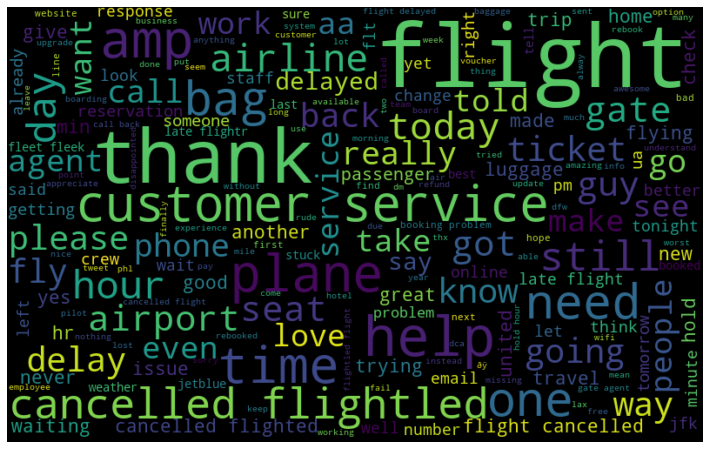

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_words = ' '.join([line for line in df_tweets1['text']])

wordcl = WordCloud(width = 800, height = 500 , random_state=42 , max_font_size=100).generate(all_words)
plt.figure(figsize = (15,8))
plt.imshow(wordcl, interpolation = 'bilinear' )
plt.axis('off')
plt.show()

In [ ]:
#wordcloud of positive tweets

pos_words = ' '.join([line for line in df_tweets1['text'][df_tweets1['polarity']>0]])
#print(pos_words)

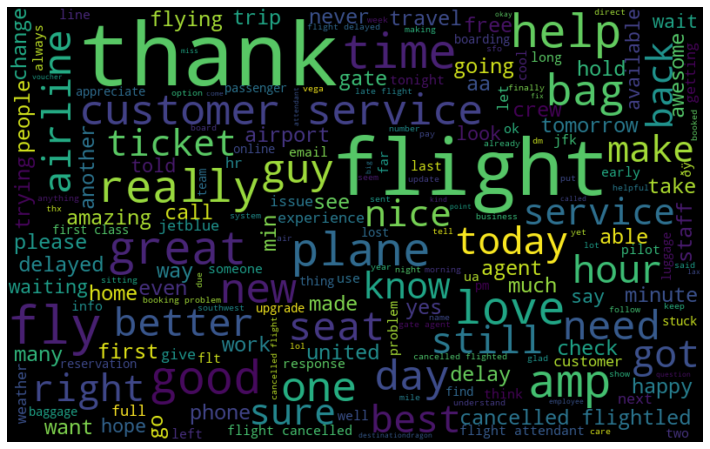

In [ ]:
wordcl = WordCloud(width = 800, height = 500 , random_state=42 , max_font_size=100).generate(pos_words)
plt.figure(figsize = (15,8))
plt.imshow(wordcl, interpolation = 'bilinear' )
plt.axis('off')
plt.show()

In [ ]:
def get_analysis(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else :
    return 'Negative'


df_tweets1['Analysis']= df_tweets1['polarity'].apply(get_analysis)


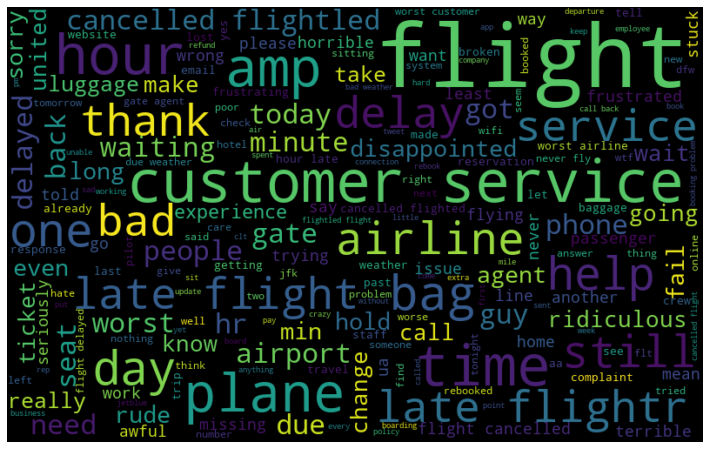

In [ ]:
#wordcloud of positive tweets
wordcl_neg = WordCloud(width = 800, height = 500 , random_state=42 , max_font_size=100).generate(' '.join([line for line in df_tweets1['text'][df_tweets1['Analysis']=='Negative']]))
plt.figure(figsize = (15,8))
plt.imshow(wordcl_neg, interpolation = 'bilinear' )
plt.axis('off')
plt.show()


In [ ]:
#unigram:: freq of top words/topics
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(x,n):
  vec = CountVectorizer().fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis = 0)
  words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq,key = lambda x : x[1], reverse = True)
  return words_freq[:10]

In [ ]:
conversation_drivers = get_top_n_words(df_tweets1['text'],500)
print(conversation_drivers)

[('flight', 3862), ('get', 1308), ('hour', 1082), ('thanks', 1061), ('cancelled', 1011), ('service', 965), ('customer', 897), ('time', 878), ('help', 839), ('would', 702)]


In [ ]:
df_tweets1['text'].apply(lambda x : re.sub(r'http','',x))
#df_tweets1.loc[df_tweets1['text']=='http']

0        please something speed wifi connection plane m...
1        offer flight cancelled flighted stranded away ...
2        cancelled flighting flight pushing next day wo...
3        disappointed flight cancelled flighted mostly ...
4        rebooked hour original flight say handling sit...
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight warning communicati...
14637             please bring american airline blackberry
14638    money change flight answer phone suggestion ma...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [ ]:
#df_drivers = pd.DataFrame(conversation_drivers, columns = ['Topic','Frequency'])
#df_drivers.plot(kind='line')

In [ ]:
#df_tweets1.dropna(subset = ['tweet_id','name'], inplace=True)

In [ ]:
df_tweets1

,retweet_count,text,tweet_created,Airlines,tweet_length,word_count,polarity,subjectivity,Analysis
0,1,please something speed wifi connection plane m...,2015-02-19 17:24:25,southwestair,55,8,0.0000,0.000000,Neutral
1,0,offer flight cancelled flighted stranded away ...,2015-02-17 12:10:00,united,55,8,0.0000,0.000000,Neutral
2,0,cancelled flighting flight pushing next day wo...,2015-02-24 10:52:27,jetblue,71,11,0.0000,0.000000,Neutral
3,0,disappointed flight cancelled flighted mostly ...,2015-02-17 19:16:37,jetblue,85,11,-0.1250,0.533333,Negative
4,0,rebooked hour original flight say handling sit...,2015-02-19 21:05:29,united,77,10,-0.1625,0.708333,Negative
...,...,...,...,...,...,...,...,...,...
14635,0,thank got different flight chicago,2015-02-22 12:01:01,americanair,34,5,0.0000,0.600000,Neutral
14636,0,leaving minute late flight warning communicati...,2015-02-22 11:59:46,americanair,75,10,-0.3000,0.600000,Negative
14637,0,please bring american airline blackberry,2015-02-22 11:59:15,americanair,40,5,0.0000,0.000000,Neutral
14638,0,money change flight answer phone suggestion ma...,2015-02-22 11:59:02,americanair,59,8,0.0000,0.000000,Neutral


Top airlines tweet by polarity

In [ ]:
sentiment_by_airlines = df_tweets1.groupby('Airlines').agg({'polarity':'sum'}).sort_values(by= ['polarity'], ascending = False)
print(sentiment_by_airlines)

                   polarity
Airlines                   
jetblue          230.468934
southwestair     225.670288
americanair       97.188055
united            94.013402
virginamerica     70.599100
nrhodes85          0.925000
shannonwoodward    0.700000
eatgregeat         0.600000
ods1819            0.500000
mandarinjourney    0.500000
ninadavuluri       0.400000
catfoodbeerglue    0.400000
kciairport         0.400000
sb5551             0.333333
dadboner           0.316667
imaginedragons     0.278571
andrewfallis       0.250000
chasefoster        0.200000
vanessaannz        0.031250
albertbreer        0.000000
deltaassist        0.000000
nytimes            0.000000
sarahpompei        0.000000
unitedâ            0.000000
internjohnradio   -0.041667
scm1133           -0.150000
malhoit           -0.300000
melissaafrancis   -0.300000
hillaconlin       -0.400000
lindaswc          -0.400000
timbennettg3      -0.500000
djevolutionhd     -1.000000
usairways        -12.051558


Text(0, 0.5, 'polarity')

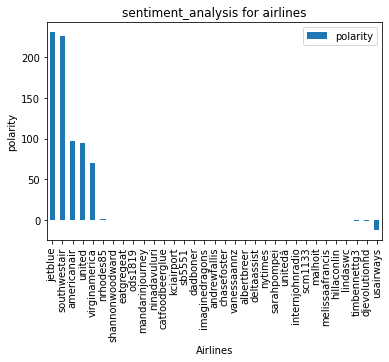

In [ ]:
sentiment_by_airlines.plot(kind = 'bar' )

#plt.xticks(rotation=30, horizontalalignment="center")
plt.title("sentiment_analysis for airlines")
plt.xlabel("Airlines")
plt.ylabel("polarity")


##**TOP airlines tweet by frequency**


In [ ]:
TopAirlines_freq = df_tweets1.groupby('Airlines', ).agg({'text':'count'}).sort_values(by='text', ascending=False).head(6)
#TopAirlines_freq.sort_values( ascending=False)
print(TopAirlines_freq)

               text
Airlines           
united         3816
usairways      2905
americanair    2754
southwestair   2417
jetblue        2215
virginamerica   504


In [ ]:
#df_tweets1['Airlines'].value_counts().values
TopAirlines_freq

,text
Airlines,
united,3816
usairways,2905
americanair,2754
southwestair,2417
jetblue,2215
virginamerica,504


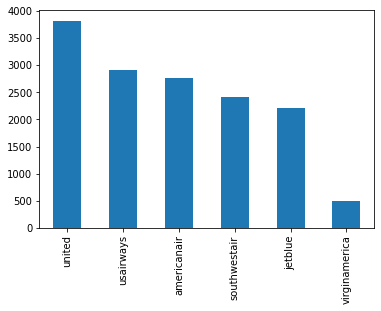

In [ ]:
df_tweets1['Airlines'].value_counts().head(6).plot(kind='bar')

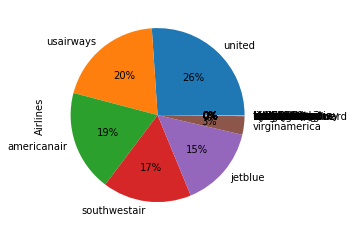

In [ ]:
df_tweets1.Airlines.value_counts().plot(kind= 'pie', autopct = '%1.0f%%')

In [ ]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Top Airlines by Frequency of Tweets')

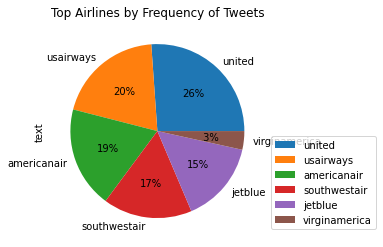

In [ ]:
TopAirlines_freq.plot(kind= 'pie',subplots=True, autopct = '%2.0f%%', )
plt.legend(loc= 'best', bbox_to_anchor=(1, 0.5))
plt.title("Top Airlines by Frequency of Tweets")

Text(0.5, 1.0, 'Sentiment Score of Airlines')

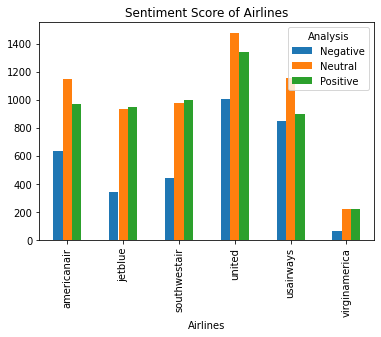

In [ ]:
#df_major =df_tweets1['Airlines','Analysis'].apply(lambda x : (TopAirlines_freq[i] for i in TopAirlines_freq ))
# print(TopAirlines_freq[i])
df_major = df_tweets1[df_tweets1['Airlines'].isin(TopAirlines_freq.index)]


#df_major
#df_major['Airlines'].unique() 
#df_major
airline_sentiments = df_major.groupby(['Airlines','Analysis']).Analysis.count().unstack()
airline_sentiments.plot(kind = 'bar')
plt.title("Sentiment Score of Airlines")

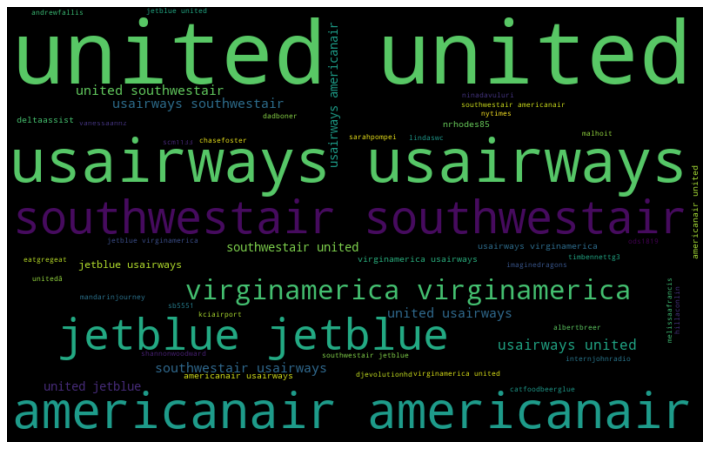

In [ ]:
#Airlines having major chatter

all_airlines = ' '.join([line for line in df_tweets1['Airlines']])

wordcl = WordCloud(width = 800, height = 500 , random_state=42 , max_font_size=100).generate(all_airlines)
plt.figure(figsize = (15,8))
plt.imshow(wordcl, interpolation = 'bilinear' )
plt.axis('off')
plt.show()

## **conversation drivers for top airlines by frequency**


In [ ]:
#conversation drivers for top airlines by freq

usairways = ' '.join([line for line in df_tweets1['text'][df_tweets1['Airlines']=='usairways']])
united = ' '.join([line for line in df_tweets1['text'][df_tweets1['Airlines']=='united']])
americanair = ' '.join([line for line in df_tweets1['text'][df_tweets1['Airlines']=='americanair']])
southwestair = ' '.join([line for line in df_tweets1['text'][df_tweets1['Airlines']=='southwestair']])
jetblue = ' '.join([line for line in df_tweets1['text'][df_tweets1['Airlines']=='jetblue']])
virginamerica = ' '.join([line for line in df_tweets1['text'][df_tweets1['Airlines']=='virginamerica']])


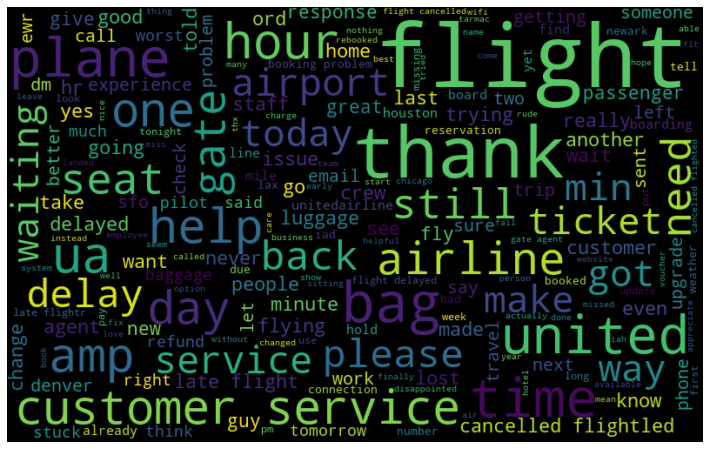

In [ ]:
#Top chatter for United Airways

wordcl_united = WordCloud(width = 800, height = 500 , random_state=42 , max_font_size=100).generate(united)
plt.figure(figsize = (15,8))
plt.imshow(wordcl_united, interpolation = 'bilinear' )
plt.axis('off')
plt.show()

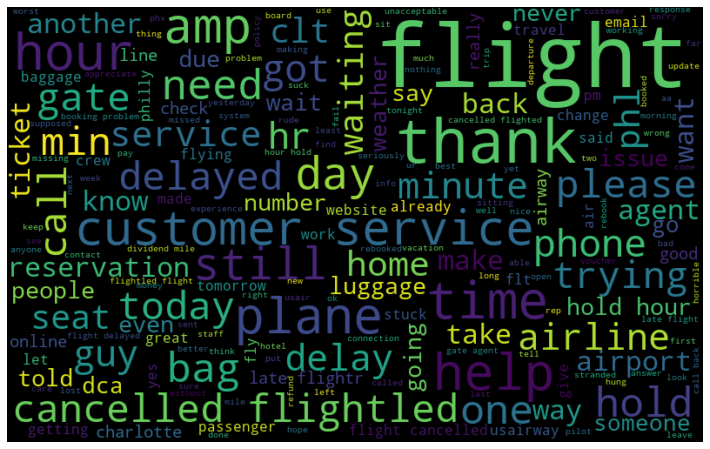

In [ ]:
#Top chatter for usairways

wordcl_usairways = WordCloud(width = 800, height = 500 , random_state=42 , max_font_size=100).generate(usairways)
plt.figure(figsize = (15,8))
plt.imshow(wordcl_usairways, interpolation = 'bilinear' )
plt.axis('off')
plt.show()

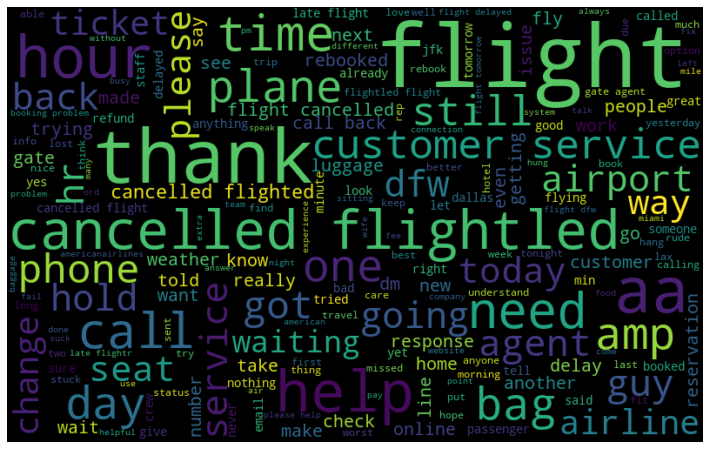

In [ ]:
#Top chatter for americanair

wordcl_americanair = WordCloud(width = 800, height = 500 , random_state=42 , max_font_size=100).generate(americanair)
plt.figure(figsize = (15,8))
plt.imshow(wordcl_americanair, interpolation = 'bilinear' )
plt.axis('off')
plt.show()

# **# Top 3 airlines that had maximum engagement (looking at the re-tweets)**

In [ ]:
Retweets = df_tweets1.groupby('Airlines').agg({'retweet_count':'sum'}).sort_values(by='retweet_count', ascending=False).head(6)

print(Retweets)

               retweet_count
Airlines                    
united                   421
usairways                249
jetblue                  248
southwestair             144
americanair              117
virginamerica             26


Text(0, 0.5, 'Re-tweets')

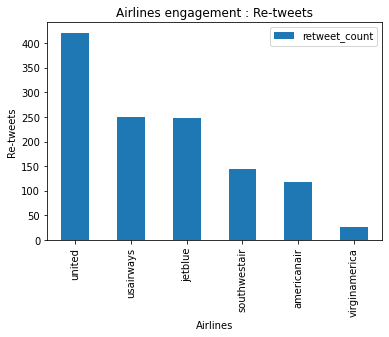

In [ ]:
Retweets.plot(kind = 'bar')
plt.title("Airlines engagement : Re-tweets")
plt.ylabel('Re-tweets')


## **Additional Tast- Conversation drivers for each airline**



In [ ]:
 #print(df_tweets1['text'][df_tweets1['Airlines']=='usairways'|df_tweets1['Airlines']=='united'|df_tweets1['Airlines']=='jetblue'|df_tweets1['Airlines']=='southwestair'|'americanair'|df_tweets1['Airlines']=='virginamerica'])
#print(df_tweets1['text'][df_tweets1['Airlines']=='usairways'|'united'|'jetblue'|'southwestair'|'americanair'|'virginamerica'])

USAIRLINES = ['usairways', 'united','jetblue','southwestair','americanair','virginamerica']
df_data_new = df_tweets1[df_tweets1['Airlines'].isin(USAIRLINES)]
df_data_new.head(5)

,retweet_count,text,tweet_created,Airlines,tweet_length,word_count,polarity,subjectivity,Analysis
0,1,please something speed wifi connection plane m...,2015-02-19 17:24:25,southwestair,55,8,0.0000,0.000000,Neutral
1,0,offer flight cancelled flighted stranded away ...,2015-02-17 12:10:00,united,55,8,0.0000,0.000000,Neutral
2,0,cancelled flighting flight pushing next day wo...,2015-02-24 10:52:27,jetblue,71,11,0.0000,0.000000,Neutral
3,0,disappointed flight cancelled flighted mostly ...,2015-02-17 19:16:37,jetblue,85,11,-0.1250,0.533333,Negative
4,0,rebooked hour original flight say handling sit...,2015-02-19 21:05:29,united,77,10,-0.1625,0.708333,Negative


In [ ]:
df_data = df_data_new[['text', 'Airlines','Analysis']].copy()
df_data.head(5)

,text,Airlines,Analysis
0,please something speed wifi connection plane m...,southwestair,Neutral
1,offer flight cancelled flighted stranded away ...,united,Neutral
2,cancelled flighting flight pushing next day wo...,jetblue,Neutral
3,disappointed flight cancelled flighted mostly ...,jetblue,Negative
4,rebooked hour original flight say handling sit...,united,Negative


In [ ]:
df_data['text_new']= df_data['text'].apply(lambda x : word_tokenize(x))
df_data.head(2)

,text,Airlines,Analysis,text_new
0,please something speed wifi connection plane m...,southwestair,Neutral,"[please, something, speed, wifi, connection, p..."
1,offer flight cancelled flighted stranded away ...,united,Neutral,"[offer, flight, cancelled, flighted, stranded,..."


In [ ]:
df_pos_tweets = df_data[df_data.Analysis == 'Positive']
df_neg_tweets = df_data[df_data.Analysis == 'Negative']
df_neg_tweets.head(2)

,text,Airlines,Analysis,text_new
3,disappointed flight cancelled flighted mostly ...,jetblue,Negative,"[disappointed, flight, cancelled, flighted, mo..."
4,rebooked hour original flight say handling sit...,united,Negative,"[rebooked, hour, original, flight, say, handli..."


In [ ]:
def generate_N_grams(text,ngram=1):
  #w = word_tokenize(text) 
  wd = ''.join(str(i) for i in text)
  words=[w for w in wd.split(" ")]
  #words = word_tokenize(text)
  #print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans
generate_N_grams(df_neg_virginamerica.text,3)

  #word = word_tokenize(text)
  #wlist= [w for w in word if w.isalnum()]
  #return " ".join(wlist)

In [ ]:
from nltk import ngrams

In [ ]:
sample= df_neg_virginamerica[0:3]

def ngra(text,n):
  wl=[]
  n_grams = ngrams(text.split(" "), n)
  for grams in n_grams:
      g = "_".join(grams)
      #print(g)
      wl.append(g)
  return wl

# df_neg_virginamerica['text_grams']=df_neg_virginamerica['text'].apply(lambda x : ngra(x))
sample['ngram_texts']=sample['text'].apply(lambda x : ngra(x,3))
sample

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,text,Airlines,Analysis,text_new,text_grams,ngram_texts
34,today must mean need take another trip,virginamerica,Negative,"[today, must, mean, need, take, another, trip]","[today_must_mean, must_mean_need, mean_need_ta...","[today_must_mean, must_mean_need, mean_need_ta..."
36,really big bad thing,virginamerica,Negative,"[really, big, bad, thing]","[really_big_bad, big_bad_thing]","[really_big_bad, big_bad_thing]"
37,seriously would pay flight seat playing really...,virginamerica,Negative,"[seriously, would, pay, flight, seat, playing,...","[seriously_would_pay, would_pay_flight, pay_fl...","[seriously_would_pay, would_pay_flight, pay_fl..."


In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

In [ ]:
!pip install pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models.ldamulticore import LdaMulticore


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
#Positive tweets by airline
#USAIRLINES = ['usairways', 'united','jetblue','southwestair','americanair','virginamerica']

df_pos_united = df_pos_tweets[df_pos_tweets.Airlines == 'united']
df_pos_usairways = df_pos_tweets[df_pos_tweets.Airlines == 'usairways']
df_pos_jetblue = df_pos_tweets[df_pos_tweets.Airlines == 'jetblue']
df_pos_southwestair = df_pos_tweets[df_pos_tweets.Airlines == 'southwestair']
df_pos_americanair = df_pos_tweets[df_pos_tweets.Airlines == 'americanair']
df_pos_virginamerica = df_pos_tweets[df_pos_tweets.Airlines == 'virginamerica']

print('postive all',df_pos_tweets.shape)
print('united pos',df_pos_united.shape)
print('usairway pos', df_pos_usairways.shape)
print('jelblue pos',df_pos_jetblue.shape)
print('southwestair pos',df_pos_southwestair.shape)
print('americanair pos',df_pos_americanair.shape)
print('virginamerica pos',df_pos_virginamerica.shape)

postive all (5373, 4)
united pos (1339, 4)
usairway pos (898, 4)
jelblue pos (945, 4)
southwestair pos (1000, 4)
americanair pos (971, 4)
virginamerica pos (220, 4)


In [ ]:
#negative tweets by airline
df_neg_united = df_neg_tweets[df_neg_tweets.Airlines == 'united']
df_neg_usairways = df_neg_tweets[df_neg_tweets.Airlines == 'usairways']
df_neg_jetblue = df_neg_tweets[df_neg_tweets.Airlines == 'jetblue']
df_neg_southwestair = df_neg_tweets[df_neg_tweets.Airlines == 'southwestair']
df_neg_americanair = df_neg_tweets[df_neg_tweets.Airlines == 'americanair']
df_neg_virginamerica = df_neg_tweets[df_neg_tweets.Airlines == 'virginamerica']

print('negative all',df_neg_tweets.shape)
print('united neg',df_neg_united.shape)
print('usairway neg', df_neg_usairways.shape)
print('jelblue neg',df_neg_jetblue.shape)
print('southwestair neg',df_neg_southwestair.shape)
print('americanair neg',df_neg_americanair.shape)
print('virginamerica neg',df_neg_virginamerica.shape)

negative all (3335, 4)
united neg (1001, 4)
usairway neg (851, 4)
jelblue neg (339, 4)
southwestair neg (444, 4)
americanair neg (637, 4)
virginamerica neg (63, 4)


In [ ]:
bigram_phrases = gensim.models.Phrases(df_data['text'], min_count=5,threshold=50)
trigram_phrases = gensim.models.Phrases(bigram_phrases[df_data['text']],threshold=50)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(text):
  return (bigram[doc] for doc in text)

def make_trigrams(text):
  return(trigram[bigram[doc]] for doc in text)

data_bigrams = make_bigrams(df_data['text'])
data_bigrams_trigrams = make_trigrams(data_bigrams)

data_bigrams_trigrams


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


<generator object make_trigrams.<locals>.<genexpr> at 0x7f7ef3a41050>

In [ ]:
def gen_words(text):
  list_of_tweet_tokens=[]
  for t in text :
    new = gensim.utils.simple_preprocess(text)
    list_of_tweet_tokens.append(new)
  return list_of_tweet_tokens


In [ ]:
data_words_neg = gen_words(''.join(str(i) for i in df_neg_tweets['text_new']))

In [ ]:
#attempt at trigrams- takens tweets of united negative and passed in these.

#data_neg_united = df_neg_united.text_new.values.tolist()
#bigram_united_N = gensim.models.Phrases(data_neg_united, min_count=5, threshold=100) # higher threshold fewer phrases.
#trigram_united_N = gensim.models.Phrases(bigram_united_N[data_neg_united], threshold=100)  
#bigram_mod_united_N = gensim.models.phrases.Phraser(bigram_united_N)
#trigram_mod_united_N = gensim.models.phrases.Phraser(trigram_united_N)
#texts = [bigram_mod_united_N[doc] for doc in data_neg_united]
#texts = [trigram_mod_united_N[bigram_mod_united_N[doc]] for doc in texts]
#texts


In [ ]:
import pandas as pd
import sys
import time
import traceback
from joblib.externals.loky import set_loky_pickler
from joblib import parallel_backend
from joblib import Parallel, delayed
from joblib import wrap_non_picklable_objects

LDA - for all-neg
# **NEGATIVE ISSUES**

******************************** **1. United Airlines**

---



In [ ]:
df_neg_united['text_grams']=df_neg_united['text'].apply(lambda x : ngra(x,2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#create dict
#neg for united

id2word_united_N = corpora.Dictionary(df_neg_united['text_grams'])
print(id2word_united_N.num_nnz)

8916


In [ ]:
corpus_united_N = [id2word_united_N.doc2bow(doc) for doc in df_neg_united['text_grams']]
print(len(corpus_united_N))

print(corpus_united_N[0][0:20])

1001
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [ ]:
#lda model
lda_united_N = gensim.models.ldamodel.LdaModel(corpus= corpus_united_N,
                                      id2word=id2word_united_N,
                                      num_topics=3,
                                      random_state=100,
                                      update_every = 1,
                                      chunksize=100,
                                      passes =10,
                                      alpha='auto')
num_topics = 8
#%time ldamodel = lda(doc_term_matrix,num_topics=num_topics, id2word=dictionary, passes =50 ,minimum_probability=0)

In [ ]:
lda_united_N.print_topics(num_topics = num_topics)

[(0,
  '0.003*"flight_delayed" + 0.002*"booking_problem" + 0.002*"gate_agent" + 0.002*"cancelled_flightled" + 0.002*"mechanical_issue" + 0.001*"miss_connection" + 0.001*"late_flight" + 0.001*"due_weather" + 0.001*"due_mechanical" + 0.001*"worst_service"'),
 (1,
  '0.034*"customer_service" + 0.032*"maintenance_issue" + 0.032*"yes_would" + 0.031*"issue_yes" + 0.031*"basic_customer" + 0.031*"beyond_opaque" + 0.031*"would_basic" + 0.031*"ewr_staff" + 0.031*"staff_manage" + 0.031*"service_ewr"'),
 (2,
  '0.004*"customer_service" + 0.001*"palm_spring" + 0.001*"flight_crew" + 0.001*"flight_experience" + 0.001*"checked_bag" + 0.001*"flight_ua" + 0.001*"round_trip" + 0.001*"united_airline" + 0.001*"worst_customer" + 0.001*"experience_ever"')]

In [ ]:
pyLDAvis.enable_notebook()

lda_display_United_N = pyLDAvis.gensim_models.prepare(lda_united_N,corpus_united_N,id2word_united_N)
lda_display_United_N

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.092519 -0.073309       1        1  36.209935
2     -0.077414  0.077786       2        1  35.266116
1      0.169934 -0.004477       3        1  28.523949, topic_info=                   Term       Freq      Total Category  logprob  loglift
3228  maintenance_issue  81.000000  81.000000  Default  30.0000  30.0000
7500          yes_would  80.000000  80.000000  Default  29.0000  29.0000
7799        would_basic  80.000000  80.000000  Default  28.0000  28.0000
7794          issue_yes  80.000000  80.000000  Default  27.0000  27.0000
7792      beyond_opaque  80.000000  80.000000  Default  26.0000  26.0000
...                 ...        ...        ...      ...      ...      ...
5538        united_help   1.102010   1.534652   Topic3  -7.7440   0.9233
1654         ua_delayed   1.480500   2.074248   Topic3  -7.4488   0.9172
6631           one_late   1.070998   1.503640   Topic3  -7.7726   0.9151
114         late_flight  10.941889  16.378069   Topic3  -5.4486   0.8511
940            day_late   2.341283   3.639936   Topic3  -6.9905   0.8132

[134 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
3476      2  0.946593  absolutely_disgusting
2863      3  0.936339           airline_ever
5613      1  0.820704               amp_want
7791      3  0.997189         basic_customer
7792      3  0.997189          beyond_opaque
...     ...       ...                    ...
1078      2  0.902825         worst_customer
1060      2  0.780555           worst_flight
2406      1  0.876256          worst_service
7799      3  0.997189            would_basic
7500      3  0.989562              yes_would

[116 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

********************************** **2.US Airways**

---



In [ ]:
df_neg_usairways['text_grams']=df_neg_usairways['text'].apply(lambda x : ngra(x,2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
id2word_usairways_N = corpora.Dictionary(df_neg_usairways['text_grams'])
print(id2word_usairways_N.num_nnz)

corpus_usairways_N = [id2word_usairways_N.doc2bow(doc) for doc in df_neg_usairways['text_grams']]
print(len(corpus_usairways_N))

print(corpus_usairways_N[0][0:20])

7441
851
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [ ]:
lda_usairways_N = gensim.models.ldamodel.LdaModel(corpus= corpus_usairways_N,
                                      id2word=id2word_usairways_N,
                                      num_topics=3,
                                      random_state=100,
                                      update_every = 1,
                                      chunksize=100,
                                      passes =10,
                                      alpha='auto')

In [ ]:
lda_usairways_N.print_topics(num_topics = num_topics)

[(0,
  '0.005*"cancelled_flightled" + 0.005*"flight_cancelled" + 0.002*"u_airway" + 0.002*"bad_weather" + 0.002*"cancelled_flightations" + 0.002*"late_flightr" + 0.002*"time_thing" + 0.002*"use_credit" + 0.002*"due_weather" + 0.002*"cancelled_flight"'),
 (1,
  '0.015*"customer_service" + 0.009*"late_flightr" + 0.004*"hour_late" + 0.004*"worst_customer" + 0.003*"booking_problem" + 0.003*"service_ever" + 0.003*"hold_hour" + 0.003*"hour_hold" + 0.003*"call_back" + 0.002*"back_late"'),
 (2,
  '0.004*"cancelled_flighted" + 0.003*"worst_airline" + 0.003*"late_flight" + 0.002*"cancelled_flightled" + 0.002*"flight_time" + 0.002*"gate_agent" + 0.002*"airline_ever" + 0.001*"change_seat" + 0.001*"baggage_claim" + 0.001*"give_u"')]

In [ ]:
lda_display_usairways_N = pyLDAvis.gensim_models.prepare(lda_usairways_N,corpus_usairways_N,id2word_usairways_N)
lda_display_usairways_N

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.117200 -0.037771       1        1  34.599288
0     -0.096274 -0.069242       2        1  33.581341
2     -0.020926  0.107014       3        1  31.819370, topic_info=                     Term       Freq      Total Category  logprob  loglift
61       customer_service  38.000000  38.000000  Default  30.0000  30.0000
103          late_flightr  27.000000  27.000000  Default  29.0000  29.0000
643             hour_late  10.000000  10.000000  Default  28.0000  28.0000
229        worst_customer  10.000000  10.000000  Default  27.0000  27.0000
139      flight_cancelled  14.000000  14.000000  Default  26.0000  26.0000
...                   ...        ...        ...      ...      ...      ...
2222     flightled_flight   3.202663   3.888131   Topic3  -6.6057   0.9511
451           late_flight   6.048345  12.109814   Topic3  -5.9699   0.4509
88             gate_agent   4.507897   7.484256   Topic3  -6.2638   0.6381
136   cancelled_flightled   5.910713  23.795962   Topic3  -5.9929  -0.2477
2728        online_flight   2.599581   3.261213   Topic3  -6.8143   0.9183

[148 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
329       3  0.927534      airline_ever
5985      3  1.016013    allowed_change
5954      2  0.714908           ask_ice
5955      2  0.714908    attendant_snap
4849      1  0.855893         back_gate
...     ...       ...               ...
366       2  1.020967           way_use
335       3  0.929261     worst_airline
229       1  0.951540    worst_customer
1201      2  0.661659  worst_experience
1201      3  0.220553  worst_experience

[131 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

*********************** **3. Americanair**

---



In [ ]:
df_neg_americanair['text_grams']=df_neg_americanair['text'].apply(lambda x : ngra(x,2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
id2word_americanair_N = corpora.Dictionary(df_neg_americanair['text_grams'])
print(id2word_americanair_N.num_nnz)

corpus_americanair_N = [id2word_americanair_N.doc2bow(doc) for doc in df_neg_americanair['text_grams']]
print(len(corpus_americanair_N))

print(corpus_americanair_N[0][0:20])

5425
637
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [ ]:
lda_americanair_N = gensim.models.ldamodel.LdaModel(corpus= corpus_americanair_N,
                                      id2word=id2word_americanair_N,
                                      num_topics=4,
                                      random_state=100,
                                      update_every = 1,
                                      chunksize=100,
                                      passes =10,
                                      alpha='auto')

In [ ]:
lda_americanair_N.print_topics(num_topics = num_topics)

[(0,
  '0.008*"cancelled_flightled" + 0.008*"flight_cancelled" + 0.004*"cancelled_flighted" + 0.004*"flightled_flight" + 0.003*"spoken_like" + 0.003*"travel_experience" + 0.003*"ticket_agent" + 0.002*"via_phone" + 0.002*"hold_time" + 0.002*"phone_hour"'),
 (1,
  '0.004*"weather_issue" + 0.004*"wait_minute" + 0.004*"customer_svc" + 0.003*"whatever_reason" + 0.003*"airport_whatever" + 0.003*"load_bag" + 0.003*"due_weather" + 0.003*"cancelled_flight" + 0.003*"cancelled_flighted" + 0.003*"trying_call"'),
 (2,
  '0.016*"late_flight" + 0.003*"bad_weather" + 0.003*"airline_ever" + 0.002*"worst_airline" + 0.002*"worst_customer" + 0.002*"flight_boarded" + 0.002*"customer_service" + 0.002*"waiting_min" + 0.002*"boarded_waiting" + 0.002*"always_late"'),
 (3,
  '0.017*"customer_service" + 0.013*"late_flightr" + 0.006*"hour_late" + 0.003*"cancelled_flighted" + 0.003*"call_back" + 0.003*"poor_customer" + 0.003*"try_late" + 0.003*"half_hour" + 0.003*"flightr_supposed" + 0.003*"wait_gate"')]

In [ ]:
lda_display_american_N = pyLDAvis.gensim_models.prepare(lda_americanair_N,corpus_americanair_N,id2word_americanair_N)
lda_display_american_N

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.047335 -0.005190       1        1  29.354972
2      0.061984 -0.095875       2        1  24.871278
1     -0.160086 -0.005016       3        1  24.450797
3      0.050767  0.106081       4        1  21.322954, topic_info=                     Term       Freq      Total Category  logprob  loglift
49            late_flight  21.000000  21.000000  Default  30.0000  30.0000
40       customer_service  22.000000  22.000000  Default  29.0000  29.0000
509          late_flightr  15.000000  15.000000  Default  28.0000  28.0000
152   cancelled_flightled  12.000000  12.000000  Default  27.0000  27.0000
154      flight_cancelled  12.000000  12.000000  Default  26.0000  26.0000
...                   ...        ...        ...      ...      ...      ...
208             hour_late   7.371237  10.448812   Topic4  -5.0558   1.1965
2076       flight_leaving   3.036017   3.716768   Topic4  -5.9428   1.3431
616             call_back   4.009862  10.048811   Topic4  -5.6646   0.6267
861    cancelled_flighted   4.036250  14.691466   Topic4  -5.6581   0.2534
253            gate_agent   2.788423   4.162739   Topic4  -6.0279   1.1447

[172 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
4551      3  0.721281  accepted_whatever
4375      4  0.981015        agent_front
4430      1  0.793630         agent_made
2766      2  0.781647       airline_ever
4394      3  0.721281        airport_guy
...     ...       ...                ...
922       1  0.356481      worst_airline
922       2  0.534721      worst_airline
1004      2  0.844307     worst_customer
4437      1  0.793630         wrong_date
538       2  0.994839          wrong_day

[152 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

*********************** **4.JetBlue**

---

In [ ]:
df_neg_jetblue['text_grams']=df_neg_jetblue['text'].apply(lambda x : ngra(x,2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
id2word_jetblue_N = corpora.Dictionary(df_neg_jetblue['text_grams'])
print(id2word_jetblue_N.num_nnz)

corpus_jetblue_N = [id2word_jetblue_N.doc2bow(doc) for doc in df_neg_jetblue['text_grams']]
print(len(corpus_jetblue_N))

print(corpus_jetblue_N[0][0:20])

2742
339
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [ ]:
lda_jetblue_N = gensim.models.ldamodel.LdaModel(corpus= corpus_jetblue_N,
                                      id2word=id2word_jetblue_N,
                                      num_topics=3,
                                      random_state=100,
                                      update_every = 1,
                                      chunksize=100,
                                      passes =10,
                                      alpha='auto')

In [ ]:
lda_jetblue_N.print_topics(num_topics = num_topics)

[(0,
  '0.003*"make_sense" + 0.002*"stuck_airport" + 0.002*"suck_though" + 0.002*"flight_meeting" + 0.002*"sense_suck" + 0.002*"airport_hour" + 0.002*"though_stuck" + 0.002*"hour_late" + 0.002*"customer_service" + 0.002*"cancelled_flighted"'),
 (1,
  '0.004*"late_flight" + 0.004*"customer_service" + 0.003*"fleet_fleek" + 0.003*"work_jetblue" + 0.002*"want_work" + 0.002*"late_flightr" + 0.002*"hr_delay" + 0.002*"jetblue_social" + 0.002*"seriously_want" + 0.002*"social_team"'),
 (2,
  '0.006*"customer_service" + 0.004*"jet_blue" + 0.004*"late_flightr" + 0.003*"delayed_hour" + 0.003*"tomorrow_morning" + 0.003*"need_get" + 0.003*"flight_delay" + 0.003*"get_home" + 0.003*"cancelled_flightled" + 0.002*"due_weather"')]

In [ ]:
lda_display_jetblue_N = pyLDAvis.gensim_models.prepare(lda_jetblue_N,corpus_jetblue_N,id2word_jetblue_N)
lda_display_jetblue_N

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.078126 -0.057286       1        1  39.484016
0     -0.050934  0.065940       2        1  33.284406
2      0.129059 -0.008654       3        1  27.231578, topic_info=                     Term      Freq     Total Category  logprob  loglift
923              jet_blue  4.000000  4.000000  Default  30.0000  30.0000
692          delayed_hour  2.000000  2.000000  Default  29.0000  29.0000
2357     tomorrow_morning  2.000000  2.000000  Default  28.0000  28.0000
1407           make_sense  3.000000  3.000000  Default  27.0000  27.0000
146              need_get  3.000000  3.000000  Default  26.0000  26.0000
...                   ...       ...       ...      ...      ...      ...
2272                one_u  1.217389  1.632287   Topic3  -6.4189   1.0075
2273       said_different  1.217389  1.632287   Topic3  -6.4189   1.0075
2274         thing_flight  1.217389  1.632287   Topic3  -6.4189   1.0075
2275                u_got  1.217389  1.632287   Topic3  -6.4189   1.0075
2276  understand_everyone  1.217389  1.632287   Topic3  -6.4189   1.0075

[161 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
711       2  1.056290         added_delay
2287      3  0.612637  airline_apparently
850       2  0.731356      airport_closed
2296      2  0.771414        airport_hour
2288      3  0.612637       angry_tweeted
...     ...       ...                 ...
233       1  1.038062           want_work
2026      1  0.947117        work_jetblue
236       1  0.516699          worked_one
236       3  0.516699          worked_one
567       1  0.709343      worst_customer

[155 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

****************** **5. SouthWest Air**

---



In [ ]:
df_neg_southwestair['text_grams']=df_neg_southwestair['text'].apply(lambda x : ngra(x,3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:

id2word_southwestair_N = corpora.Dictionary(df_neg_southwestair['text_grams'])
print(id2word_southwestair_N.num_nnz)

corpus_southwestair_N = [id2word_southwestair_N.doc2bow(doc) for doc in df_neg_southwestair['text_grams']]
print(len(corpus_southwestair_N))

print(corpus_southwestair_N[0][0:20])

3366
444
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [ ]:
lda_southwestair_N = gensim.models.ldamodel.LdaModel(corpus= corpus_southwestair_N,
                                      id2word=id2word_southwestair_N,
                                      num_topics=3,
                                      random_state=100,
                                      update_every = 1,
                                      chunksize=100,
                                      passes =10,
                                      alpha='auto')

In [ ]:
lda_southwestair_N.print_topics(num_topics = num_topics)

[(0,
  '0.005*"worst_customer_service" + 0.004*"flight_cancelled_flightled" + 0.003*"customer_service_terrible" + 0.003*"service_airline_ever" + 0.003*"customer_service_airline" + 0.003*"cancelled_flightled_flight" + 0.002*"cancelled_flighting_flight" + 0.002*"never_fly_southwest" + 0.002*"phone_wait_time" + 0.002*"customer_service_right"'),
 (1,
  '0.002*"agent_jacquie_plitt" + 0.001*"terrible_customer_service" + 0.001*"country_backroads_help" + 0.001*"hour_late_flight" + 0.001*"hold_hr_get" + 0.001*"airport_flight_icy" + 0.001*"sna_agent_jacquie" + 0.001*"backroads_help_pls" + 0.001*"get_airport_flight" + 0.001*"hr_get_airport"'),
 (2,
  '0.005*"flight_cancelled_flightled" + 0.004*"cancelled_flightled_flight" + 0.002*"cancelled_flightled_morning" + 0.002*"poor_customer_service" + 0.002*"need_request_refund" + 0.002*"morning_due_weather" + 0.002*"flightled_morning_due" + 0.002*"request_refund_flight" + 0.002*"refund_flight_cancelled" + 0.001*"sorry_keep_waiting"')]

In [ ]:
lda_display_southwestair_N = pyLDAvis.gensim_models.prepare(lda_southwestair_N,corpus_southwestair_N,id2word_southwestair_N)
lda_display_southwestair_N

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.115719 -0.010274       1        1  35.658728
2     -0.071832 -0.058676       2        1  32.989724
1     -0.043886  0.068950       3        1  31.351547, topic_info=                            Term       Freq  ...  logprob  loglift
1424      worst_customer_service   6.000000  ...  30.0000  30.0000
772   flight_cancelled_flightled  10.000000  ...  29.0000  29.0000
3002        service_airline_ever   3.000000  ...  28.0000  28.0000
2983   customer_service_terrible   3.000000  ...  27.0000  27.0000
2998    customer_service_airline   3.000000  ...  26.0000  26.0000
...                          ...        ...  ...      ...      ...
1678               hr_phone_hold   0.660534  ...  -7.3763   0.7556
1679                  lost_gt_hr   0.660534  ...  -7.3763   0.7556
2306           never_fly_airline   0.660548  ...  -7.3763   0.3476
1504         late_flight_leaving   0.660534  ...  -7.3763   0.5153
1608       male_flight_attendant   0.660534  ...  -7.3763   0.2885

[134 rows x 6 columns], token_table=      Topic      Freq                       Term
term                                            
1898      3  1.038883        agent_jacquie_plitt
3176      1  0.968265  airline_flying_frustrated
1738      3  0.686143         airport_flight_icy
3046      1  0.968265          already_wasted_hr
1672      3  1.010407          alt_flight_unable
...     ...       ...                        ...
3049      1  0.968265            wasted_hr_phone
2268      2  0.633395         worst_airline_ever
2268      3  0.633395         worst_airline_ever
1424      1  0.877959     worst_customer_service
2332      2  0.900033            year_issue_past

[113 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

****************** **6. Virgin America**

---

In [ ]:
#adding ngram to virgin america negative dataset
df_neg_virginamerica['text_grams']=df_neg_virginamerica['text'].apply(lambda x : ngra(x,3))
df_neg_virginamerica.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,Airlines,Analysis,text_new,text_grams
34,today must mean need take another trip,virginamerica,Negative,"[today, must, mean, need, take, another, trip]","[today_must_mean, must_mean_need, mean_need_ta..."
36,really big bad thing,virginamerica,Negative,"[really, big, bad, thing]","[really_big_bad, big_bad_thing]"


In [ ]:
id2word_virginamerica_N = corpora.Dictionary(df_neg_virginamerica['text_grams'])
print(id2word_virginamerica_N.num_nnz)

corpus_virginamerica_N = [id2word_virginamerica_N.doc2bow(doc) for doc in df_neg_virginamerica['text_grams']]
print(len(corpus_virginamerica_N))

print(corpus_virginamerica_N[0][0:20])

446
63
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [ ]:
lda_virginamerica_N = gensim.models.ldamodel.LdaModel(corpus= corpus_virginamerica_N,
                                      id2word=id2word_virginamerica_N,
                                      num_topics=4,
                                      random_state=100,
                                      update_every = 1,
                                      chunksize=100,
                                      passes =10,
                                      alpha='auto')

In [ ]:
lda_virginamerica_N.print_topics(num_topics = num_topics)

[(0,
  '0.006*"extra_buck_luggage" + 0.006*"cancelled_flighted_psp" + 0.006*"luggage_might_afford" + 0.006*"think_paying_extra" + 0.006*"disappointed_expected_better" + 0.006*"hiring_hand_lame" + 0.006*"psp_jfk_notification" + 0.006*"interesting_video_disappointed" + 0.006*"flight_seat_playing" + 0.006*"disappointed_cancelled_flightled"'),
 (1,
  '0.005*"airport_next_flightled" + 0.005*"scheduled_pm_departure" + 0.005*"pm_departure_still" + 0.005*"delayed_airport_next" + 0.005*"one_sec_delayed" + 0.005*"next_flightled_going" + 0.005*"due_weather_look" + 0.005*"weather_look_like" + 0.005*"email_call_reschedule" + 0.005*"cancelled_flight_vx"'),
 (2,
  '0.009*"section_website_seems" + 0.009*"website_seems_broken" + 0.005*"amp_f_number" + 0.005*"headphone_flight_iad" + 0.005*"passenger_leave_plane" + 0.005*"remove_bag_st" + 0.005*"today_seat_one" + 0.005*"expensive_headphone_flight" + 0.005*"answering_l_amp" + 0.005*"let_scanned_passenger"'),
 (3,
  '0.007*"fuel_exhausted_frequent" + 0.007

In [ ]:
lda_display_virginamerica_N = pyLDAvis.gensim_models.prepare(lda_virginamerica_N,corpus_virginamerica_N,id2word_virginamerica_N)
lda_display_virginamerica_N

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.103632  0.053256       1        1  32.409033
2      0.099211  0.058988       2        1  29.963042
0      0.003357 -0.093248       3        1  20.913149
3      0.001065 -0.018996       4        1  16.714777, topic_info=                        Term      Freq     Total Category  logprob  loglift
300    section_website_seems  1.000000  1.000000  Default  30.0000  30.0000
302     website_seems_broken  1.000000  1.000000  Default  29.0000  29.0000
249  fuel_exhausted_frequent  0.000000  0.000000  Default  28.0000  28.0000
374         swanky_pink_mood  0.000000  0.000000  Default  27.0000  27.0000
244    direct_flight_purpose  0.000000  0.000000  Default  26.0000  26.0000
..                       ...       ...       ...      ...      ...      ...
286    expect_choppy_landing  0.503533  0.895416   Topic4  -4.9975   1.2132
291        say_expect_choppy  0.503533  0.895416   Topic4  -4.9975   1.2132
250       paid_direct_flight  0.503533  0.895416   Topic4  -4.9975   1.2132
143         book_seat_flight  0.503533  0.895416   Topic4  -4.9975   1.2132
147       even_check_creates  0.503532  0.895417   Topic4  -4.9975   1.2132

[151 rows x 6 columns], token_table=      Topic      Freq                    Term
term                                         
151       3  1.052828      afford_hiring_hand
230       1  0.945861  airport_next_flightled
29        2  0.963349            amp_f_number
30        2  0.963350         answering_l_amp
84        3  1.052829  anything_today_website
...     ...       ...                     ...
302       2  0.631504    website_seems_broken
88        3  1.052828     website_useless_one
15        3  1.052828        would_pay_flight
159       3  1.052829      would_think_paying
253       4  1.116800         wtf_paid_direct

[121 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

##**POSITIVE ISSUES**

********************** **1.United Air**

---



In [ ]:
df_pos_united['text_grams']=df_pos_united['text'].apply(lambda x : ngra(x,2))
df_pos_united.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Airlines,Analysis,text_new,text_grams
9,page best call hold min,united,Positive,"[page, best, call, hold, min]","[page_best, best_call, call_hold, hold_min]"
536,thanks,united,Positive,[thanks],[]
537,thanks taking care mr happy customer,united,Positive,"[thanks, taking, care, mr, happy, customer]","[thanks_taking, taking_care, care_mr, mr_happy..."
540,thanks filled luck common,united,Positive,"[thanks, filled, luck, common]","[thanks_filled, filled_luck, luck_common]"
541,express connection hugely popular could hop,united,Positive,"[express, connection, hugely, popular, could, ...","[express_connection, connection_hugely, hugely..."
543,think boarded flight au early,united,Positive,"[think, boarded, flight, au, early]","[think_boarded, boarded_flight, flight_au, au_..."
547,thanks,united,Positive,[thanks],[]
548,thanks ticket,united,Positive,"[thanks, ticket]",[thanks_ticket]
554,sure united info system,united,Positive,"[sure, united, info, system]","[sure_united, united_info, info_system]"
555,car seat lost reimburse new one pair shoe nece...,united,Positive,"[car, seat, lost, reimburse, new, one, pair, s...","[car_seat, seat_lost, lost_reimburse, reimburs..."


In [ ]:
id2word_united_P = corpora.Dictionary(df_pos_united['text_grams'])
print(id2word_united_P.num_nnz)
corpus_united_P = [id2word_united_P.doc2bow(doc) for doc in df_pos_united['text_grams']]
print(len(corpus_united_P))

print(corpus_united_P[0][0:20])

10563
1339
[(0, 1), (1, 1), (2, 1), (3, 1)]


In [ ]:
lda_united_P = gensim.models.ldamodel.LdaModel(corpus= corpus_united_P,
                                      id2word=id2word_united_P,
                                      num_topics=4,
                                      random_state=100,
                                      update_every = 1,
                                      chunksize=100,
                                      passes =10,
                                      alpha='auto')

In [ ]:
lda_united_P.print_topics(num_topics = num_topics)

[(0,
  '0.009*"customer_service" + 0.004*"first_class" + 0.003*"cancelled_flightled" + 0.003*"make_sure" + 0.002*"filled_form" + 0.002*"booking_problem" + 0.002*"thanks_help" + 0.002*"go_thru" + 0.002*"flown_time" + 0.002*"time_last"'),
 (1,
  '0.003*"customer_service" + 0.002*"late_flightr" + 0.002*"much_le" + 0.002*"next_flight" + 0.002*"hour_delay" + 0.002*"flight_time" + 0.002*"meal_voucher" + 0.002*"need_help" + 0.002*"pleasantly_surprised" + 0.001*"cost_check"'),
 (2,
  '0.002*"cancelled_flight" + 0.002*"thank_much" + 0.002*"flight_ewr" + 0.002*"let_u" + 0.002*"flight_staff" + 0.002*"flight_plane" + 0.002*"remind_flight" + 0.002*"even_indicating" + 0.002*"indicating_meal" + 0.002*"btw_true"'),
 (3,
  '0.007*"flight_attendant" + 0.003*"late_flight" + 0.003*"weather_delay" + 0.002*"delay_sfo" + 0.002*"friendly_sky" + 0.002*"thanks_clarification" + 0.002*"destination_time" + 0.002*"safety_video" + 0.002*"number_call" + 0.002*"direct_number"')]

In [ ]:
lda_display_United_P = pyLDAvis.gensim_models.prepare(lda_united_P,corpus_united_P,id2word_united_P)
lda_display_United_P

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.082047 -0.113668       1        1  26.194650
0     -0.037947  0.101798       2        1  25.099937
1      0.150776 -0.028078       3        1  24.423958
2     -0.030782  0.039949       4        1  24.281455, topic_info=                     Term       Freq      Total Category  logprob  loglift
247      flight_attendant  19.000000  19.000000  Default  30.0000  30.0000
176      customer_service  30.000000  30.000000  Default  29.0000  29.0000
2034          first_class  12.000000  12.000000  Default  28.0000  28.0000
1022          late_flight   9.000000   9.000000  Default  27.0000  27.0000
1062  cancelled_flightled  11.000000  11.000000  Default  26.0000  26.0000
...                   ...        ...        ...      ...      ...      ...
8510             golf_bag   2.633952   3.025564   Topic4  -6.8812   1.2768
491         united_flight   2.612238   3.003849   Topic4  -6.8894   1.2758
8679           flight_ewr   4.674312   5.813412   Topic4  -6.3076   1.1974
5715         flight_plane   4.194768   5.769907   Topic4  -6.4158   1.0966
732           full_refund   2.808677   4.447599   Topic4  -6.8169   0.9558

[163 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
9320      3  0.998131    additional_bag
9091      3  0.998131           air_car
9292      2  0.877001  apparently_flown
9127      3  0.998131      attempt_year
9321      3  0.998131     bag_traveling
...     ...       ...               ...
9119      2  0.877001      warm_passing
3922      1  0.950817     weather_delay
9298      2  0.877001   week_experience
1934      2  0.854018          would_go
2071      4  0.950353       would_great

[140 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

********************** **2.US Airways**

---



In [ ]:
df_pos_usairways['text_grams']=df_pos_usairways['text'].apply(lambda x : ngra(x,2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
id2word_usairways_P = corpora.Dictionary(df_pos_usairways['text_grams'])
print(id2word_usairways_P.num_nnz)
corpus_usairways_P = [id2word_usairways_P.doc2bow(doc) for doc in df_pos_usairways['text_grams']]
print(len(corpus_usairways_P))

print(corpus_usairways_P[0][0:20])

7192
898
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [ ]:
lda_usairways_P = gensim.models.ldamodel.LdaModel(corpus= corpus_usairways_P,
                                      id2word=id2word_usairways_P,
                                      num_topics=4,
                                      random_state=100,
                                      update_every = 1,
                                      chunksize=100,
                                      passes =10,
                                      alpha='auto')

In [ ]:
lda_usairways_P.print_topics(num_topics = num_topics)

[(0,
  '0.005*"first_class" + 0.003*"hour_hold" + 0.002*"flight_attendant" + 0.002*"late_flight" + 0.002*"hold_hour" + 0.001*"u_air" + 0.001*"month_ago" + 0.001*"booked_flight" + 0.001*"flight_full" + 0.001*"service_desk"'),
 (1,
  '0.007*"customer_service" + 0.005*"u_airway" + 0.003*"gate_agent" + 0.003*"thank_much" + 0.002*"great_service" + 0.002*"great_job" + 0.002*"admiral_club" + 0.002*"first_class" + 0.002*"real_person" + 0.002*"need_change"'),
 (2,
  '0.005*"follow_please" + 0.003*"best_follow" + 0.003*"first_time" + 0.002*"airway_follow" + 0.002*"best_airway" + 0.002*"dividend_mile" + 0.002*"get_free" + 0.001*"great_people" + 0.001*"amazing_best" + 0.001*"get_back"'),
 (3,
  '0.009*"cancelled_flightled" + 0.004*"booking_problem" + 0.003*"flightled_flight" + 0.003*"flight_delayed" + 0.003*"flight_cancelled" + 0.003*"reflight_booking" + 0.002*"need_help" + 0.002*"let_u" + 0.002*"call_back" + 0.002*"cancelled_flight"')]

In [ ]:
lda_display_usairways_P = pyLDAvis.gensim_models.prepare(lda_usairways_P,corpus_usairways_P,id2word_usairways_P)
lda_display_usairways_P

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.128022  0.028581       1        1  26.713065
2      0.030398 -0.099093       2        1  25.502037
0      0.024664 -0.031608       3        1  24.560250
1      0.072961  0.102120       4        1  23.224648, topic_info=                     Term       Freq      Total Category  logprob  loglift
469   cancelled_flightled  16.000000  16.000000  Default  30.0000  30.0000
44       customer_service  15.000000  15.000000  Default  29.0000  29.0000
133              u_airway   8.000000   8.000000  Default  28.0000  28.0000
1663        follow_please   8.000000   8.000000  Default  27.0000  27.0000
876           first_class  12.000000  12.000000  Default  26.0000  26.0000
...                   ...        ...        ...      ...      ...      ...
691        thanks_getting   1.705487   2.168252   Topic4  -6.8869   1.2199
240             great_job   3.893032   5.858232   Topic4  -6.0616   1.0513
124                 fly_u   1.995856   2.635807   Topic4  -6.7297   1.1818
876           first_class   3.342454  12.653491   Topic4  -6.2141   0.1287
679      flight_attendant   1.814073   6.507084   Topic4  -6.8252   0.1826

[173 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
4936      3  0.791657       able_put
17        4  0.780999   admiral_club
3973      2  0.963094      agent_clt
5616      4  0.868387       ago_used
5785      2  0.912774  airway_follow
...     ...       ...            ...
1345      1  0.780379     would_like
5739      2  0.717998   would_lovely
537       2  0.306893     would_nice
537       3  0.613786     would_nice
643       3  1.028092        yes_pay

[149 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

***************** **American Air**

---



In [ ]:
df_pos_americanair['text_grams']=df_pos_americanair['text'].apply(lambda x : ngra(x,2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
id2word_americanair_P = corpora.Dictionary(df_pos_americanair['text_grams'])
print(id2word_americanair_P.num_nnz)
corpus_americanair_P = [id2word_americanair_P.doc2bow(doc) for doc in df_pos_americanair['text_grams']]
print(len(corpus_americanair_P))

print(corpus_americanair_P[0][0:20])

7604
971
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [ ]:
lda_americanair_P = gensim.models.ldamodel.LdaModel(corpus= corpus_americanair_P,
                                      id2word=id2word_americanair_P,
                                      num_topics=4,
                                      random_state=100,
                                      update_every = 1,
                                      chunksize=100,
                                      passes =10,
                                      alpha='auto')

In [ ]:
lda_americanair_P.print_topics(num_topics = num_topics)

[(0,
  '0.004*"flight_delayed" + 0.003*"gate_agent" + 0.003*"let_u" + 0.003*"call_volume" + 0.002*"change_flight" + 0.002*"feel_like" + 0.002*"high_call" + 0.002*"ever_experienced" + 0.001*"phone_system" + 0.001*"exp_member"'),
 (1,
  '0.004*"cancelled_flighted" + 0.004*"able_get" + 0.002*"make_sure" + 0.002*"get_home" + 0.002*"first_time" + 0.002*"call_center" + 0.002*"cancelled_flightled" + 0.002*"u_airway" + 0.001*"last_year" + 0.001*"look_good"'),
 (2,
  '0.012*"cancelled_flightled" + 0.006*"flight_cancelled" + 0.003*"flightled_flight" + 0.003*"first_class" + 0.002*"flight_attendant" + 0.002*"flight_dfw" + 0.002*"home_tomorrow" + 0.002*"keep_good" + 0.002*"good_work" + 0.002*"late_flight"'),
 (3,
  '0.009*"customer_service" + 0.006*"cancelled_flight" + 0.002*"new_flight" + 0.002*"booking_problem" + 0.002*"reflight_booking" + 0.002*"good_luck" + 0.002*"one_agent" + 0.002*"work_tomorrow" + 0.002*"refund_ticket" + 0.001*"representative_busy"')]

In [ ]:
lda_display_americanair_P = pyLDAvis.gensim_models.prepare(lda_americanair_P,corpus_americanair_P,id2word_americanair_P)
lda_display_americanair_P

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.001684 -0.129372       1        1  26.923863
1     -0.118866  0.072818       2        1  25.986732
0      0.000569 -0.013836       3        1  23.987300
3      0.119982  0.070390       4        1  23.102105, topic_info=                     Term       Freq      Total Category  logprob  loglift
86    cancelled_flightled  28.000000  28.000000  Default  30.0000  30.0000
433      customer_service  16.000000  16.000000  Default  29.0000  29.0000
134      flight_cancelled  13.000000  13.000000  Default  28.0000  28.0000
3        cancelled_flight  10.000000  10.000000  Default  27.0000  27.0000
67     cancelled_flighted   8.000000   8.000000  Default  26.0000  26.0000
...                   ...        ...        ...      ...      ...      ...
142       booking_problem   4.123108   7.888399   Topic4  -6.0546   0.8165
1589        work_tomorrow   3.218632   5.421923   Topic4  -6.3022   0.9438
2790        please_follow   2.067894   2.965692   Topic4  -6.7447   1.1047
3659     automated_system   1.821075   2.428553   Topic4  -6.8718   1.1774
1922          thanks_help   1.771889   2.454440   Topic4  -6.8991   1.1394

[177 rows x 6 columns], token_table=      Topic      Freq                    Term
term                                         
13        3  0.821328                 aa_gold
5845      3  0.866208                 aa_sure
1980      2  0.952068                able_get
5916      4  0.917206  accurate_authoritative
14        3  0.821328      acquisition_flight
...     ...       ...                     ...
1589      4  0.553309           work_tomorrow
3533      1  0.294293       would_appreciated
3533      2  0.882880       would_appreciated
835       3  0.802322             would_great
383       1  0.979245              would_like

[155 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])

********************* **4.JetBlue**

---



In [ ]:
df_pos_jetblue['text_grams']=df_pos_jetblue['text'].apply(lambda x : ngra(x,2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
id2word_jetblue_P = corpora.Dictionary(df_pos_jetblue['text_grams'])
print(id2word_jetblue_P.num_nnz)
corpus_jetblue_P = [id2word_jetblue_P.doc2bow(doc) for doc in df_pos_jetblue['text_grams']]
print(len(corpus_jetblue_P))

print(corpus_jetblue_P[0][0:20])

6520
945
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [ ]:
lda_jetblue_P = gensim.models.ldamodel.LdaModel(corpus= corpus_jetblue_P,
                                      id2word=id2word_jetblue_P,
                                      num_topics=4,
                                      random_state=100,
                                      update_every = 1,
                                      chunksize=100,
                                      passes =10,
                                      alpha='auto')

In [ ]:
lda_jetblue_P.print_topics(num_topics = num_topics)

[(0,
  '0.005*"social_medium" + 0.005*"great_thanks" + 0.003*"thanks_flight" + 0.002*"fleet_fleek" + 0.002*"guy_great" + 0.002*"excited_fly" + 0.002*"love_flying" + 0.002*"would_much" + 0.002*"jet_blue" + 0.002*"fly_jetblue"'),
 (1,
  '0.009*"new_ceo" + 0.009*"passenger_wall" + 0.008*"seek_right" + 0.008*"right_balance" + 0.008*"please_passenger" + 0.008*"ceo_seek" + 0.008*"balance_please" + 0.006*"customer_service" + 0.003*"would_love" + 0.003*"jet_blue"'),
 (2,
  '0.003*"great_flight" + 0.002*"yes_great" + 0.002*"love_jetblue" + 0.002*"flight_delayed" + 0.002*"booking_problem" + 0.002*"flight_booking" + 0.002*"awesome_thanks" + 0.002*"example_thanks" + 0.002*"awesome_jetblue" + 0.002*"great_example"'),
 (3,
  '0.004*"great_service" + 0.003*"cancelled_flightled" + 0.002*"good_work" + 0.002*"return_flight" + 0.002*"free_wifi" + 0.002*"business_traveler" + 0.002*"miss_much" + 0.002*"flightled_flight" + 0.002*"keep_good" + 0.002*"new_livery"')]

In [ ]:
lda_display_jetblue_P = pyLDAvis.gensim_models.prepare(lda_jetblue_P,corpus_jetblue_P,id2word_jetblue_P)
lda_display_jetblue_P

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.060009  0.117872       1        1  25.829571
0      0.147885  0.006154       2        1  25.517783
1     -0.053777 -0.098290       3        1  24.423820
2     -0.034099 -0.025737       4        1  24.228826, topic_info=                  Term       Freq      Total Category  logprob  loglift
1315           new_ceo  14.000000  14.000000  Default  30.0000  30.0000
2480    passenger_wall  14.000000  14.000000  Default  29.0000  29.0000
2481  please_passenger  13.000000  13.000000  Default  28.0000  28.0000
2477    balance_please  13.000000  13.000000  Default  27.0000  27.0000
2482     right_balance  13.000000  13.000000  Default  26.0000  26.0000
...                ...        ...        ...      ...      ...      ...
2196      late_flightr   1.818543   2.244764   Topic4  -6.7670   1.2071
1910        would_nice   1.653933   2.069311   Topic4  -6.8618   1.1936
3648     soon_possible   1.538289   1.926907   Topic4  -6.9343   1.1924
3782        still_love   1.624572   2.056757   Topic4  -6.8798   1.1817
4290       time_flying   1.450354   1.838919   Topic4  -6.9932   1.1803

[160 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
5760      3  0.922935  agent_practical
5751      3  0.922935          ah_wish
3267      2  0.863798        almost_hr
5677      4  0.912913  awesome_jetblue
72        4  0.858113   awesome_thanks
...     ...       ...              ...
5707      1  0.915103      work_thanks
583       3  0.951481       would_love
4929      2  0.800371       would_much
1910      4  0.966505       would_nice
5051      4  0.941784        yes_great

[136 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

********************* **5.South West Air**

---



In [ ]:
df_pos_southwestair['text_grams']=df_pos_southwestair['text'].apply(lambda x : ngra(x,2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
id2word_southwestair_P = corpora.Dictionary(df_pos_southwestair['text_grams'])
print(id2word_southwestair_P.num_nnz)
corpus_southwestair_P = [id2word_southwestair_P.doc2bow(doc) for doc in df_pos_southwestair['text_grams']]
print(len(corpus_southwestair_P))

print(corpus_southwestair_P[0][0:20])

7310
1000
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


In [ ]:
lda_southwestair_P = gensim.models.ldamodel.LdaModel(corpus= corpus_southwestair_P,
                                      id2word=id2word_southwestair_P,
                                      num_topics=4,
                                      random_state=100,
                                      update_every = 1,
                                      chunksize=100,
                                      passes =10,
                                      alpha='auto')

In [ ]:
lda_southwestair_P.print_topics(num_topics = num_topics)

[(0,
  '0.004*"great_job" + 0.003*"cancelled_flighted" + 0.002*"thanks_taking" + 0.002*"imagine_dragon" + 0.002*"reason_nut" + 0.002*"another_reason" + 0.002*"next_time" + 0.002*"direct_flight" + 0.002*"love_go" + 0.002*"atlanta_airport"'),
 (1,
  '0.005*"would_love" + 0.003*"great_flight" + 0.002*"best_friend" + 0.002*"fly_southwest" + 0.002*"loyal_customer" + 0.002*"get_ticket" + 0.002*"could_get" + 0.002*"almost_hour" + 0.002*"would_nice" + 0.002*"love_southwest"'),
 (2,
  '0.010*"customer_service" + 0.003*"flight_attendant" + 0.003*"best_airline" + 0.002*"able_get" + 0.002*"thank_much" + 0.002*"really_appreciate" + 0.002*"checked_bag" + 0.002*"first_time" + 0.002*"cancelled_flight" + 0.001*"thanks_much"'),
 (3,
  '0.005*"flight_cancelled" + 0.005*"cancelled_flightled" + 0.004*"hold_hour" + 0.002*"change_flight" + 0.002*"looking_forward" + 0.002*"get_back" + 0.002*"round_trip" + 0.002*"love_flying" + 0.002*"cancelled_flighted" + 0.002*"one_flight"')]

In [ ]:
lda_display_southwestair_P = pyLDAvis.gensim_models.prepare(lda_southwestair_P,corpus_southwestair_P,id2word_southwestair_P)
lda_display_southwestair_P

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.031404 -0.012052       1        1  26.170715
3     -0.139303  0.010595       2        1  25.106290
2      0.045362 -0.102667       3        1  24.525462
1      0.062537  0.104124       4        1  24.197534, topic_info=                     Term       Freq      Total Category  logprob  loglift
370      customer_service  18.000000  18.000000  Default  30.0000  30.0000
380      flight_cancelled  10.000000  10.000000  Default  29.0000  29.0000
378   cancelled_flightled   8.000000   8.000000  Default  28.0000  28.0000
1702           would_love   8.000000   8.000000  Default  27.0000  27.0000
940             great_job   7.000000   7.000000  Default  26.0000  26.0000
...                   ...        ...        ...      ...      ...      ...
3759         atlanta_show   1.756368   2.195821   Topic4  -6.9148   1.1956
1421            hour_late   1.681922   2.103849   Topic4  -6.9581   1.1951
4089           get_ticket   3.288843   4.258653   Topic4  -6.2875   1.1605
1749           trying_fly   2.395504   4.110951   Topic4  -6.6045   0.8789
3812            back_home   1.760896   2.820155   Topic4  -6.9123   0.9480

[170 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
5535      2  0.745973   able_change
2197      3  0.838723      able_get
4866      3  0.850187  airline_love
231       4  0.808519   almost_hour
149       3  0.996348    always_fly
...     ...       ...           ...
4808      3  0.750356    would_need
1689      4  0.898860    would_nice
6351      2  1.016637      year_ago
4736      2  0.809471   year_flying
1787      2  0.950746      year_old

[151 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

********************** **6. Virgin America**

---



In [ ]:
df_pos_virginamerica['text_grams']=df_pos_virginamerica['text'].apply(lambda x : ngra(x,2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
id2word_virginamerica_P = corpora.Dictionary(df_pos_virginamerica['text_grams'])
print(id2word_virginamerica_P.num_nnz)
corpus_virginamerica_P = [id2word_virginamerica_P.doc2bow(doc) for doc in df_pos_virginamerica['text_grams']]
print(len(corpus_virginamerica_P))

print(corpus_virginamerica_P[0][0:20])

1464
220
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [ ]:
lda_virginamerica_P = gensim.models.ldamodel.LdaModel(corpus= corpus_virginamerica_P,
                                      id2word=id2word_virginamerica_P,
                                      num_topics=4,
                                      random_state=100,
                                      update_every = 1,
                                      chunksize=100,
                                      passes =10,
                                      alpha='auto')

In [ ]:
lda_virginamerica_P.print_topics(num_topics = num_topics)

[(0,
  '0.010*"customer_service" + 0.008*"thanks_much" + 0.007*"best_customer" + 0.006*"folk_ewr" + 0.006*"la_folk" + 0.006*"incredible_letsgohome" + 0.006*"home_la" + 0.006*"got_pm" + 0.006*"pm_newark" + 0.006*"haul_airline"'),
 (1,
  '0.006*"would_love" + 0.005*"first_class" + 0.003*"pillow_instead" + 0.003*"arm_race" + 0.003*"class_arm" + 0.003*"instead_seat" + 0.003*"add_pillow" + 0.003*"seat_first" + 0.003*"want_look" + 0.003*"may_want"'),
 (2,
  '0.003*"first_time" + 0.003*"love_guy" + 0.003*"let_u" + 0.003*"time_flying" + 0.003*"virgin_america" + 0.002*"safety_video" + 0.002*"old_battling" + 0.002*"battling_cancer" + 0.002*"thought_know" + 0.002*"late_flight"'),
 (3,
  '0.009*"man_steel" + 0.009*"new_route" + 0.008*"would_fly" + 0.008*"fare_amazings" + 0.008*"fargo_fare" + 0.008*"fly_fargo" + 0.008*"really_wish" + 0.008*"wish_would" + 0.008*"route_austin" + 0.008*"call_day"')]

In [ ]:
lda_display_virginamerica_P = pyLDAvis.gensim_models.prepare(lda_virginamerica_P,corpus_virginamerica_P,id2word_virginamerica_P)
lda_display_virginamerica_P

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.031715 -0.095894       1        1  45.045971
0     -0.153266  0.038581       2        1  19.794100
3      0.105932  0.089237       3        1  17.639522
1      0.015618 -0.031924       4        1  17.520408, topic_info=                  Term      Freq     Total Category  logprob  loglift
331   customer_service  3.000000  3.000000  Default  30.0000  30.0000
1241         man_steel  2.000000  2.000000  Default  29.0000  29.0000
866          new_route  3.000000  3.000000  Default  28.0000  28.0000
623        thanks_much  2.000000  2.000000  Default  27.0000  27.0000
1327      lt_wervirgin  2.000000  2.000000  Default  26.0000  26.0000
...                ...       ...       ...      ...      ...      ...
1138  future_passenger  0.506208  0.901127   Topic4  -6.2279   1.1651
1139         jack_work  0.506208  0.901127   Topic4  -6.2279   1.1651
1140       kind_sucked  0.506208  0.901127   Topic4  -6.2279   1.1651
1141       look_future  0.506208  0.901127   Topic4  -6.2279   1.1651
1142   sucked_earphone  0.506208  0.901127   Topic4  -6.2279   1.1651

[157 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
798       4  0.784463          add_pillow
1267      2  0.863074          added_site
1292      2  0.863074   airline_cancelled
1303      3  0.839508  airline_commercial
1276      2  0.863074      airline_europe
...     ...       ...                 ...
691       1  0.888309     watch_nominated
1275      2  0.863074   whole_infographic
1285      2  0.863074         wifi_better
1283      2  0.863074     would_defiantly
536       4  1.045850          would_love

[133 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

TFIDF #Try

In [ ]:
from gensim.models import TfidfModel


In [ ]:
#id2word_virginamerica_N = corpora.Dictionary(df_neg_virginamerica['text_grams'])
#print(id2word_virginamerica_N.num_nnz)

#corpus_virginamerica_N = [id2word_virginamerica_N.doc2bow(doc) for doc in df_neg_virginamerica['text_grams']]
#print(len(corpus_virginamerica_N))
#print(corpus_virginamerica_N[0][0:20])

#tfidf_virginamerica_N = TfidfModel(corpus_virginamerica_N, id2word=id2word_virginamerica_N)

#low_value = 0.03
#words=[]
#words_missing_tfidf= []
#for i in range(0, len(corpus_virginamerica_N)):
#  bow= corpus_virginamerica_N[i]
#  low_value_words = []
#  tfidf_ids = [id for id ,value in tfidf_virginamerica_N[bow]]
#  bow_ids = [id for id , value in bow]
#  low_value_words = [id for id , value in tfidf_virginamerica_N[bow] if value < low_value ]
#  drops = low_value_words+words_missing_tfidf
#  for items in drops : 
#    words.append(id2word_virginamerica_N[items])
#  words_missing_tfidf = [id for id in bow_ids if id not in tfidf_ids]

#  new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_tfidf]
#  corpus_virginamerica_N[i]= new_bow

In [ ]:
#id2word_americanair_N = corpora.Dictionary(df_neg_americanair['text_grams'])
#print(id2word_americanair_N.num_nnz)

#corpus_americanair_N = [id2word_americanair_N.doc2bow(doc) for doc in df_neg_americanair['text_grams']]
#print(len(corpus_americanair_N))
#print(corpus_americanair_N[0][0:20])

#tfidf_americanair_N = TfidfModel(corpus_americanair_N, id2word=id2word_americanair_N)

#low_value = 0.03
#words=[]
#words_missing_tfidf= []
#for i in range(0, len(corpus_americanair_N)):
#  bow= corpus_americanair_N[i]
#  low_value_words = []
#  tfidf_ids = [id for id ,value in tfidf_americanair_N[bow]]
#  bow_ids = [id for id , value in bow]
#  low_value_words = [id for id , value in tfidf_americanair_N[bow] if value < low_value ]
#  drops = low_value_words+words_missing_tfidf
#  for items in drops : 
#    words.append(id2word_americanair_N[items])
#  words_missing_tfidf = [id for id in bow_ids if id not in tfidf_ids]

#  new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_tfidf]
#  corpus_americanair_N[i]= new_bow

5425
637
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [ ]:
!pip install --upgrade pandas==1.2

     |████████████████████████████████| 9.9 MB 12.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.2.0 which is incompatible.


In [ ]:
pd.__version__

'1.1.5'

In [ ]:
!jupyter nbconvert --to html US_Airlines_textAnalysis_task2_FinalAns.ipynb

[NbConvertApp] Converting notebook twitter_data_analysis_US_Airlines.ipynb to html
[NbConvertApp] Writing 2942162 bytes to twitter_data_analysis_US_Airlines.html
